# Champion Analysis
Analysis of metrics obtained from saved champions of the various runs.

## Imports and General Setup

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tpg.agent import Agent, loadAgent
from tpg.utils import pathDepths, actionInstructionStats, learnerInstructionStats, getLearners, getTeams
import gym
from numpy import append, clip, mean
from math import sin, cos, pi
from copy import deepcopy
from IPython import display
import matplotlib

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Run Type')
    
ops = ["ADD", "SUB", "MULT", "DIV", "NEG", "COS"]

### Load in Champions/Agents and their 1000 Episode Results

In [2]:
gp1_agent = loadAgent("run-data/gp/1/agent2.pkl")
gp2_agent = loadAgent("run-data/gp/2/agent2.pkl")
gp3_agent = loadAgent("run-data/gp/3/agent2.pkl") 
gp4_agent = loadAgent("run-data/gp/4/agent2.pkl") # best 
gp5_agent = loadAgent("run-data/gp/5/agent2.pkl")
gp_agents = [gp1_agent, gp2_agent, gp3_agent, gp4_agent, gp5_agent]
gp_best = gp4_agent

sbb1_agent = loadAgent("run-data/sbb/1/agent2.pkl") # best
sbb2_agent = loadAgent("run-data/sbb/2/agent2.pkl")
sbb3_agent = loadAgent("run-data/sbb/3/agent2.pkl")
sbb4_agent = loadAgent("run-data/sbb/4/agent2.pkl")
sbb5_agent = loadAgent("run-data/sbb/5/agent2.pkl")
sbb_agents = [sbb1_agent, sbb2_agent, sbb3_agent, sbb4_agent, sbb5_agent]
sbb_best = sbb1_agent

tpg1_agent = loadAgent("run-data/tpg/1/agent2.pkl")
tpg2_agent = loadAgent("run-data/tpg/2/agent2.pkl")
tpg3_agent = loadAgent("run-data/tpg/3/agent2.pkl") 
tpg4_agent = loadAgent("run-data/tpg/4/agent2.pkl") # best
tpg5_agent = loadAgent("run-data/tpg/5/agent2.pkl")
tpg_agents = [tpg1_agent, tpg2_agent, tpg3_agent, tpg4_agent, tpg5_agent]
tpg_best = tpg4_agent

tpgsbb1_agent = loadAgent("run-data/tpgsbb/1/agent2.pkl")
tpgsbb2_agent = loadAgent("run-data/tpgsbb/2/agent2.pkl")
tpgsbb3_agent = loadAgent("run-data/tpgsbb/3/agent2.pkl")
tpgsbb4_agent = loadAgent("run-data/tpgsbb/4/agent2.pkl") # best
tpgsbb5_agent = loadAgent("run-data/tpgsbb/5/agent2.pkl")
tpgsbb_agents = [tpgsbb1_agent, tpgsbb2_agent, tpgsbb3_agent, tpgsbb4_agent, tpgsbb5_agent]
tpgsbb_best = tpgsbb4_agent


# save scores over 1000 episodes
gp1 = pickle.load(open("run-data/gp/1/agent-scores-3.pkl", "rb"))
gp2 = pickle.load(open("run-data/gp/2/agent-scores-3.pkl", "rb"))
gp3 = pickle.load(open("run-data/gp/3/agent-scores-3.pkl", "rb"))
gp4 = pickle.load(open("run-data/gp/4/agent-scores-3.pkl", "rb"))
gp5 = pickle.load(open("run-data/gp/5/agent-scores-3.pkl", "rb"))
gp = gp1 + gp2 + gp3 + gp4 + gp5
gps = [gp1, gp2, gp3, gp4, gp5]

sbb1 = pickle.load(open("run-data/sbb/1/agent-scores-3.pkl", "rb"))
sbb2 = pickle.load(open("run-data/sbb/2/agent-scores-3.pkl", "rb"))
sbb3 = pickle.load(open("run-data/sbb/3/agent-scores-3.pkl", "rb"))
sbb4 = pickle.load(open("run-data/sbb/4/agent-scores-3.pkl", "rb"))
sbb5 = pickle.load(open("run-data/sbb/5/agent-scores-3.pkl", "rb"))
sbb = sbb1 + sbb2 + sbb3 + sbb4 + sbb5
sbbs = [sbb1, sbb2, sbb3, sbb4, sbb5]

tpg1 = pickle.load(open("run-data/tpg/1/agent-scores-3.pkl", "rb"))
tpg2 = pickle.load(open("run-data/tpg/2/agent-scores-3.pkl", "rb"))
tpg3 = pickle.load(open("run-data/tpg/3/agent-scores-3.pkl", "rb"))
tpg4 = pickle.load(open("run-data/tpg/4/agent-scores-3.pkl", "rb"))
tpg5 = pickle.load(open("run-data/tpg/5/agent-scores-3.pkl", "rb"))
tpg = tpg1 + tpg2 + tpg3 + tpg4 + tpg5
tpgs = [tpg1, tpg2, tpg3, tpg4, tpg5]

tpgsbb1 = pickle.load(open("run-data/tpgsbb/1/agent-scores-3.pkl", "rb"))
tpgsbb2 = pickle.load(open("run-data/tpgsbb/2/agent-scores-3.pkl", "rb"))
tpgsbb3 = pickle.load(open("run-data/tpgsbb/3/agent-scores-3.pkl", "rb"))
tpgsbb4 = pickle.load(open("run-data/tpgsbb/4/agent-scores-3.pkl", "rb"))
tpgsbb5 = pickle.load(open("run-data/tpgsbb/5/agent-scores-3.pkl", "rb"))
tpgsbb = tpgsbb1 + tpgsbb2 + tpgsbb3 + tpgsbb4 + tpgsbb5
tpgsbbs = [tpgsbb1, tpgsbb2, tpgsbb3, tpgsbb4, tpgsbb5]

## Plot of Agents' Performances

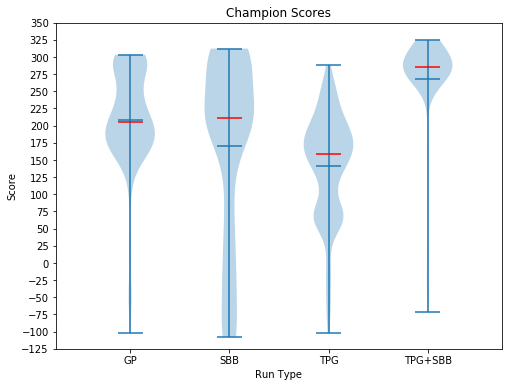

In [3]:
plt.figure(figsize=(8,6))

ax = plt.axes()

parts = plt.violinplot((gp, sbb, tpg, tpgsbb), showmeans=True, showmedians=True, points=500)

parts["cmedians"].set_color("r")

plt.title("Champion Scores")
plt.xlabel("Run Type")
plt.ylabel("Score")
plt.ylim(-120, 335)
plt.yticks(np.arange(-125, 351, 25))

set_axis_style(ax, ["GP", "SBB", "TPG", "TPG+SBB"])

plt.savefig("images/champ-scores.pdf", bbox_inches="tight")
plt.show()

## Overview of Agents' Performances and Structures

### GP

In [4]:
for i in range(len(gps)):
    print(f"GP {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(gps[i])}")
    print(f"Median Score: {np.median(gps[i])}")
    print(f"Std Score: {np.std(gps[i])}\n")

    print("Structure:")
    print(f"Act Instructions: {actionInstructionStats(getLearners(gp_agents[i].team), ops)}\n\n")

GP 1

Scores:
Mean Score: 235.98467296780586
Median Score: 254.22951070095488
Std Score: 67.49620639201457

Structure:
Act Instructions: {'overall': {'total': 28, 'min': 28, 'max': 28, 'avg': 28.0}, 'ADD': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'SUB': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'MULT': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'DIV': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'NEG': {'total': 2, 'min': 2, 'max': 2, 'avg': 2.0}, 'COS': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'numActPrograms': 1}


GP 2

Scores:
Mean Score: 155.53180216035392
Median Score: 189.42766052072326
Std Score: 91.6507314090717

Structure:
Act Instructions: {'overall': {'total': 34, 'min': 34, 'max': 34, 'avg': 34.0}, 'ADD': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'SUB': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'MULT': {'total': 10, 'min': 10, 'max': 10, 'avg': 10.0}, 'DIV': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'NEG': {'total': 4, 'min': 4, 'max': 4, 'avg

### SBB

In [5]:
for i in range(len(sbb_agents)):
    print(f"SBB {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(sbbs[i])}")
    print(f"Median Score: {np.median(sbbs[i])}")
    print(f"Std Score: {np.std(sbbs[i])}\n")

    print("Structure:")
    print(f"Teams: {len(getTeams(sbb_agents[i].team))}")
    print(f"Learners: {len(getLearners(sbb_agents[i].team))}")
    print(f"Path Depths: {pathDepths(sbb_agents[i].team)}")

    print(f"\nBid Instructions: {learnerInstructionStats(getLearners(sbb_agents[i].team), ops)}")
    print(f"\nAct Instructions: {actionInstructionStats(getLearners(sbb_agents[i].team), ops)}\n\n")

SBB 1

Scores:
Mean Score: 267.9246484683742
Median Score: 281.8847261645212
Std Score: 54.70273978675392

Structure:
Teams: 1
Learners: 2
Path Depths: [1]

Bid Instructions: {'overall': {'total': 121, 'min': 54, 'max': 67, 'avg': 60.5}, 'ADD': {'total': 20, 'min': 9, 'max': 11, 'avg': 10.0}, 'SUB': {'total': 17, 'min': 8, 'max': 9, 'avg': 8.5}, 'MULT': {'total': 20, 'min': 6, 'max': 14, 'avg': 10.0}, 'DIV': {'total': 22, 'min': 9, 'max': 13, 'avg': 11.0}, 'NEG': {'total': 19, 'min': 9, 'max': 10, 'avg': 9.5}, 'COS': {'total': 23, 'min': 10, 'max': 13, 'avg': 11.5}}

Act Instructions: {'overall': {'total': 49, 'min': 13, 'max': 36, 'avg': 24.5}, 'ADD': {'total': 5, 'min': 2, 'max': 3, 'avg': 2.5}, 'SUB': {'total': 9, 'min': 2, 'max': 7, 'avg': 4.5}, 'MULT': {'total': 14, 'min': 2, 'max': 12, 'avg': 7.0}, 'DIV': {'total': 7, 'min': 3, 'max': 4, 'avg': 3.5}, 'NEG': {'total': 9, 'min': 1, 'max': 8, 'avg': 4.5}, 'COS': {'total': 5, 'min': 2, 'max': 3, 'avg': 2.5}, 'numActPrograms': 2}


SB

### TPG

In [6]:
for i in range(len(tpg_agents)):
    print(f"TPG {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(tpgs[i])}")
    print(f"Median Score: {np.median(tpgs[i])}")
    print(f"Std Score: {np.std(tpgs[i])}\n")

    print("Structure:")
    print(f"Teams: {len(getTeams(tpg_agents[i].team))}")
    print(f"Learners: {len(getLearners(tpg_agents[i].team))}")
    print(f"Path Depths: {pathDepths(tpg_agents[i].team)}")

    print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpg_agents[i].team), ops)}")
    print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpg_agents[i].team), ops)}\n\n")

TPG 1

Scores:
Mean Score: 142.82481663872116
Median Score: 149.42134431089977
Std Score: 38.506150662336346

Structure:
Teams: 23
Learners: 71
Path Depths: [1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 13, 14, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 13, 14, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 14, 15, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 14, 15]

Bid Instructions: {'overall': {'total': 2517, 'min': 2, 'max': 61, 'avg': 35.45070422535212}, 'ADD': {'total': 518, 'min': 0, 'max': 13, 'avg': 7.295774647887323}, 'SUB': {'total': 371, 'min': 0, 'max': 13, 'avg': 5.225352112676056}, 'MULT': {'total': 393, 'min': 0, 'max': 13, 'avg': 5.535211267605634}, 'DIV': {'total': 459, 'min': 0, 'max': 14, 'avg': 6.464788732394367}, 'NEG': {'total': 422, 'min': 0, 'max': 14, 'avg': 5.943661971830986}, 'COS': {'total': 354, 'min': 0, 'max': 11, 'avg': 4.985915492957747}}

Act Instructions: {'overall': {'total': 1569, 'min': 2, 'max': 6

### TPG+SBB

In [7]:
for i in range(len(tpgsbb_agents)):
    print(f"TPG+SBB {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(tpgsbbs[i])}")
    print(f"Median Score: {np.median(tpgsbbs[i])}")
    print(f"Std Score: {np.std(tpgsbbs[i])}\n")

    print("Structure:")
    print(f"Teams: {len(getTeams(tpgsbb_agents[i].team))}")
    print(f"Learners: {len(getLearners(tpgsbb_agents[i].team))}")
    print(f"Path Depths: {pathDepths(tpgsbb_agents[i].team)}")

    print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb_agents[i].team), ops)}")
    print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb_agents[i].team), ops)}\n\n")

TPG+SBB 1

Scores:
Mean Score: 246.98650652796104
Median Score: 275.5277834702621
Std Score: 77.1385080054739

Structure:
Teams: 6
Learners: 12
Path Depths: [1, 2, 3, 4, 5, 6]

Bid Instructions: {'overall': {'total': 321, 'min': 15, 'max': 34, 'avg': 26.75}, 'ADD': {'total': 50, 'min': 1, 'max': 6, 'avg': 4.166666666666667}, 'SUB': {'total': 62, 'min': 3, 'max': 9, 'avg': 5.166666666666667}, 'MULT': {'total': 53, 'min': 0, 'max': 9, 'avg': 4.416666666666667}, 'DIV': {'total': 49, 'min': 0, 'max': 9, 'avg': 4.083333333333333}, 'NEG': {'total': 51, 'min': 2, 'max': 6, 'avg': 4.25}, 'COS': {'total': 56, 'min': 2, 'max': 9, 'avg': 4.666666666666666}}

Act Instructions: {'overall': {'total': 295, 'min': 7, 'max': 51, 'avg': 24.583333333333332}, 'ADD': {'total': 54, 'min': 1, 'max': 13, 'avg': 4.5}, 'SUB': {'total': 50, 'min': 0, 'max': 12, 'avg': 4.166666666666666}, 'MULT': {'total': 58, 'min': 1, 'max': 10, 'avg': 4.833333333333333}, 'DIV': {'total': 38, 'min': 2, 'max': 8, 'avg': 3.166666

## Get Agent Runtime Metrics

### Do Runs and Set Up Data Fields

In [8]:
"""
Check out some metrics of Agents actions during a run.
"""

def agent_paths(agent, frames=99999):

    env = gym.make("BipedalWalker-v3")
    team_learner_visits_ids = {}
    
    paths = []

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        trace = {}

        act = agent.act(state, path_trace=trace)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward
        
        paths.append(deepcopy(trace))

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)
    
    return paths


In [9]:
print("GP:")
gp_paths = agent_paths(gp_best)

# gp stats
gp_times = []
gp_actions = []
gp_n_act_instructions = []

# save dict of learners by id
gp_lrnr = getLearners(gp_best.team)[0]


print("\nSBB:")
sbb_paths = agent_paths(sbb_best)

# tpgsbb stats
sbb_times = []
sbb_actions = []
sbb_teams_vis = []
sbb_learners_vis = []
sbb_n_teams_vis = []
sbb_n_learners_vis = []
sbb_n_instructions = []
sbb_n_act_instructions = []

# save dict of learners by id
sbb_lrnrs = {}
for lrnr in getLearners(sbb_best.team):
    sbb_lrnrs[str(lrnr.id)] = lrnr
    

print("\nTPG:")
tpg_paths = agent_paths(tpg_best)

# tpgsbb stats
tpg_times = []
tpg_actions = []
tpg_teams_vis = []
tpg_learners_vis = []
tpg_n_teams_vis = []
tpg_n_learners_vis = []
tpg_n_instructions = []
tpg_n_act_instructions = []

# save dict of learners by id
tpg_lrnrs = {}
for lrnr in getLearners(tpg_best.team):
    tpg_lrnrs[str(lrnr.id)] = lrnr


print("\nTPG+SBB:")
tpgsbb_paths = agent_paths(tpgsbb_best)

# tpgsbb stats
tpgsbb_times = []
tpgsbb_actions = []
tpgsbb_teams_vis = []
tpgsbb_learners_vis = []
tpgsbb_n_teams_vis = []
tpgsbb_n_learners_vis = []
tpgsbb_n_instructions = []
tpgsbb_n_act_instructions = []

# save dict of learners by id
tpgsbb_lrnrs = {}
for lrnr in getLearners(tpgsbb_best.team):
    tpgsbb_lrnrs[str(lrnr.id)] = lrnr

GP:


/home/amaral/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score:  299.6270552373704
Total frames:  1351

SBB:


/home/amaral/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score:  308.2385557979845
Total frames:  1476

TPG:
Score:  235.85316758070277
Total frames:  1599

TPG+SBB:
Score:  299.2945481476822
Total frames:  1599


### Get the Data

In [10]:
# get data from gp path
for path in gp_paths:
    gp_times.append(path["execution_time"])
    gp_actions.append(clip(path["final_action"][1], -1, 1))
    gp_n_act_instructions.append(len(
        gp_lrnr.actionObj.program.instructions))

    
# get data from sbb path
for path in sbb_paths:
    sbb_times.append(path["execution_time"])
    sbb_actions.append(clip(path["final_action"][1], -1, 1))
    sbb_teams_vis.append([])
    sbb_learners_vis.append([])
    sbb_n_instructions.append(0)
    
    for team_visit in path["path"]:
        sbb_teams_vis[-1].append(team_visit["team_id"])
        
        for learner_visit in team_visit["bids"]:
            sbb_learners_vis[-1].append(learner_visit["learner_id"])
            sbb_n_instructions[-1] += len(
                sbb_lrnrs[learner_visit["learner_id"]].program.instructions)
    
    
    sbb_n_teams_vis.append(len(sbb_teams_vis[-1]))
    sbb_n_learners_vis.append(len(sbb_learners_vis[-1]))
    sbb_n_act_instructions.append(len(
        sbb_lrnrs[path["path"][-1]["top_learner"]]
            .actionObj.program.instructions))
    
    
# get data from tpg path
for path in tpg_paths:
    tpg_times.append(path["execution_time"])
    tpg_actions.append(clip(path["final_action"][1], -1, 1))
    tpg_teams_vis.append([])
    tpg_learners_vis.append([])
    tpg_n_instructions.append(0)
    
    for team_visit in path["path"]:
        tpg_teams_vis[-1].append(team_visit["team_id"])
        
        for learner_visit in team_visit["bids"]:
            tpg_learners_vis[-1].append(learner_visit["learner_id"])
            tpg_n_instructions[-1] += len(
                tpg_lrnrs[learner_visit["learner_id"]].program.instructions)
    
    
    tpg_n_teams_vis.append(len(tpg_teams_vis[-1]))
    tpg_n_learners_vis.append(len(tpg_learners_vis[-1]))
    tpg_n_act_instructions.append(len(
        tpg_lrnrs[path["path"][-1]["top_learner"]]
            .actionObj.program.instructions))
    
    
# get data from tpg+sbb path
for path in tpgsbb_paths:
    tpgsbb_times.append(path["execution_time"])
    tpgsbb_actions.append(clip(path["final_action"][1], -1, 1))
    tpgsbb_teams_vis.append([])
    tpgsbb_learners_vis.append([])
    tpgsbb_n_instructions.append(0)
    
    for team_visit in path["path"]:
        tpgsbb_teams_vis[-1].append(team_visit["team_id"])
        
        for learner_visit in team_visit["bids"]:
            tpgsbb_learners_vis[-1].append(learner_visit["learner_id"])
            tpgsbb_n_instructions[-1] += len(
                tpgsbb_lrnrs[learner_visit["learner_id"]].program.instructions)
    
    
    tpgsbb_n_teams_vis.append(len(tpgsbb_teams_vis[-1]))
    tpgsbb_n_learners_vis.append(len(tpgsbb_learners_vis[-1]))
    tpgsbb_n_act_instructions.append(len(
        tpgsbb_lrnrs[path["path"][-1]["top_learner"]]
            .actionObj.program.instructions))

## Analyze Observation Space Usage in Programs

In [11]:
obs_labels = ["Hull Angle", "Hull Ang. Vel.", "Velocity X",
              "Velocity Y", "Hip 1 Angle", "Hip 1 Speed", 
              "Knee 1 Angle", "Knee 1 Speed", "Leg 1 Contact", 
              "Hip 2 Angle", "Hip 2 Speed", "Knee 2 Angle",
              "Knee 2 Speed", "Leg 2 Contact", "Lidar 1", "Lidar 2",
              "Lidar 3", "Lidar 4", "Lidar 5", "Lidar 6", "Lidar 7",
              "Lidar 8", "Lidar 9", "Lidar 10", "Sin / 5", "Cos / 5",
              "Sin / 10", "Cos / 10", "Sin / 20", "Cos / 20"]

src_to_obs = {}
for i in range(len(obs_labels)):
    src_to_obs[i] = obs_labels[i]
    
# get all data in numeric array form for visualization
all_obs_data = []

"""GP observation data"""

# set up counts dict
gp_counts = {}
for key in src_to_obs.keys():
    gp_counts[src_to_obs[key]] = 0

# add instructions to counts
instructions = gp_lrnr.actionObj.program.instructions
for instruction in instructions:
    if instruction[0] == 1:
        gp_counts[src_to_obs[instruction[3]]] += 1 / len(instructions)
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(gp_counts[label])
    
print("GP Observation Space Uses:\n", gp_counts, "\n")


""" SBB observation data"""

# get actually used bid and act learners
sbb_bid_learners = set()
sbb_act_learners = set()
for l_list in sbb_learners_vis:
    for l in l_list:
        sbb_bid_learners.add(l)
    sbb_act_learners.add(l_list[-1])

# set up counts dicts
sbb_bid_counts = {}
sbb_act_counts = {}
for key in src_to_obs.keys():
    sbb_bid_counts[src_to_obs[key]] = 0
    sbb_act_counts[src_to_obs[key]] = 0

# get the counts
for l in sbb_bid_learners:
    instructions = sbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            sbb_bid_counts[src_to_obs[instruction[3]]] += 1/len(sbb_bid_learners)/len(instructions)
        
for l in sbb_act_learners:
    instructions = sbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            sbb_act_counts[src_to_obs[instruction[3]]] += 1/len(sbb_act_learners)/len(instructions)
        
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(sbb_bid_counts[label])
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(sbb_act_counts[label])
    
print("SBB Bid Observation Space Uses:\n", sbb_bid_counts, "\n")
print("SBB Act Observation Space Uses:\n", sbb_act_counts, "\n")


""" TPG observation data"""

# get actually used bid and act learners
tpg_bid_learners = set()
tpg_act_learners = set()
for l_list in tpg_learners_vis:
    for l in l_list:
        tpg_bid_learners.add(l)
    tpg_act_learners.add(l_list[-1])

# set up counts dicts
tpg_bid_counts = {}
tpg_act_counts = {}
for key in src_to_obs.keys():
    tpg_bid_counts[src_to_obs[key]] = 0
    tpg_act_counts[src_to_obs[key]] = 0

# get the counts
for l in tpg_bid_learners:
    instructions = tpg_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            tpg_bid_counts[src_to_obs[instruction[3]]] += 1/len(tpg_bid_learners)/len(instructions)
        
for l in tpg_act_learners:
    instructions = tpg_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            tpg_act_counts[src_to_obs[instruction[3]]] += 1/len(tpg_act_learners)/len(instructions)
        
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpg_bid_counts[label])
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpg_act_counts[label])
    
print("TPG Bid Observation Space Uses:\n", tpg_bid_counts, "\n")
print("TPG Act Observation Space Uses:\n", tpg_act_counts, "\n")



"""TPG+SBB observation data"""

# get actually used bid and act learners
tpgsbb_bid_learners = set()
tpgsbb_act_learners = set()
for l_list in tpgsbb_learners_vis:
    for l in l_list:
        tpgsbb_bid_learners.add(l)
    tpgsbb_act_learners.add(l_list[-1])

# set up counts dicts
tpgsbb_bid_counts = {}
tpgsbb_act_counts = {}
for key in src_to_obs.keys():
    tpgsbb_bid_counts[src_to_obs[key]] = 0
    tpgsbb_act_counts[src_to_obs[key]] = 0

# get the counts
for l in tpgsbb_bid_learners:
    instructions = tpgsbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            tpgsbb_bid_counts[src_to_obs[instruction[3]]] += 1/len(tpgsbb_bid_learners)/len(instructions)
        
for l in tpgsbb_act_learners:
    instructions = tpgsbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        if instruction[0] == 1:
            tpgsbb_act_counts[src_to_obs[instruction[3]]] += 1/len(tpgsbb_act_learners)/len(instructions)
        
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpgsbb_bid_counts[label])
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpgsbb_act_counts[label])
    
print("TPG+SBB Bid Observation Space Uses:\n", tpgsbb_bid_counts, "\n")
print("TPG+SBB Act Observation Space Uses:\n", tpgsbb_act_counts)

all_obs_data = np.flip(np.array(all_obs_data), axis=0)

GP Observation Space Uses:
 {'Hull Angle': 0.041666666666666664, 'Hull Ang. Vel.': 0.041666666666666664, 'Velocity X': 0.041666666666666664, 'Velocity Y': 0.013888888888888888, 'Hip 1 Angle': 0.027777777777777776, 'Hip 1 Speed': 0.013888888888888888, 'Knee 1 Angle': 0, 'Knee 1 Speed': 0.027777777777777776, 'Leg 1 Contact': 0, 'Hip 2 Angle': 0.06944444444444445, 'Hip 2 Speed': 0.013888888888888888, 'Knee 2 Angle': 0, 'Knee 2 Speed': 0.027777777777777776, 'Leg 2 Contact': 0.013888888888888888, 'Lidar 1': 0, 'Lidar 2': 0.013888888888888888, 'Lidar 3': 0.013888888888888888, 'Lidar 4': 0, 'Lidar 5': 0, 'Lidar 6': 0.013888888888888888, 'Lidar 7': 0.013888888888888888, 'Lidar 8': 0.013888888888888888, 'Lidar 9': 0, 'Lidar 10': 0.013888888888888888, 'Sin / 5': 0.013888888888888888, 'Cos / 5': 0.041666666666666664, 'Sin / 10': 0.041666666666666664, 'Cos / 10': 0, 'Sin / 20': 0.013888888888888888, 'Cos / 20': 0.013888888888888888} 

SBB Bid Observation Space Uses:
 {'Hull Angle': 0.0259812050856

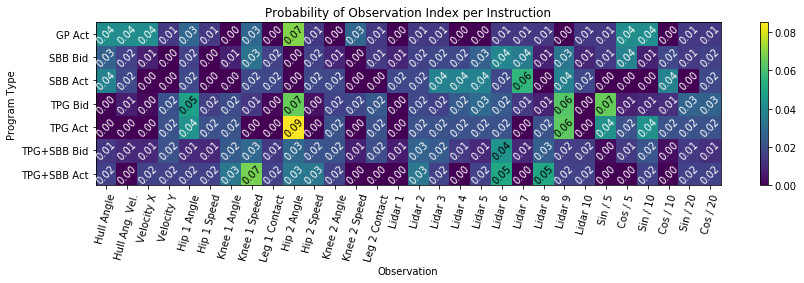

In [12]:
plt.figure(figsize=(14,3))

hm = plt.pcolor(all_obs_data)

plt.xticks(np.arange(len(obs_labels))+0.5, rotation=75)
hm.axes.set_xticklabels(obs_labels)

plt.yticks(np.arange(len(all_obs_data))+0.5, rotation=0)
hm.axes.set_yticklabels(["TPG+SBB Act", "TPG+SBB Bid",
                         "TPG Act", "TPG Bid",
                         "SBB Act", "SBB Bid",
                         "GP Act"])

for row in range(len(range(7))):
    for col in range(len(obs_labels)):
        if all_obs_data[row][col] > np.max(all_obs_data)/2:
            plt.text(col+0.5, row+0.5, '%.2f' % all_obs_data[row][col],
                 ha='center', va='center', color="black",
                    rotation=45)
        else:
            plt.text(col+0.5, row+0.5, '%.2f' % all_obs_data[row][col],
                     ha='center', va='center', color="white",
                    rotation=45)

plt.colorbar(hm)

plt.xlabel("Observation")
plt.ylabel("Program Type")
plt.title("Probability of Observation Index per Instruction")

plt.savefig("images/champ-instruction-prob.pdf", bbox_inches="tight")
plt.show()

## Plots of Actions and Learners used over Time

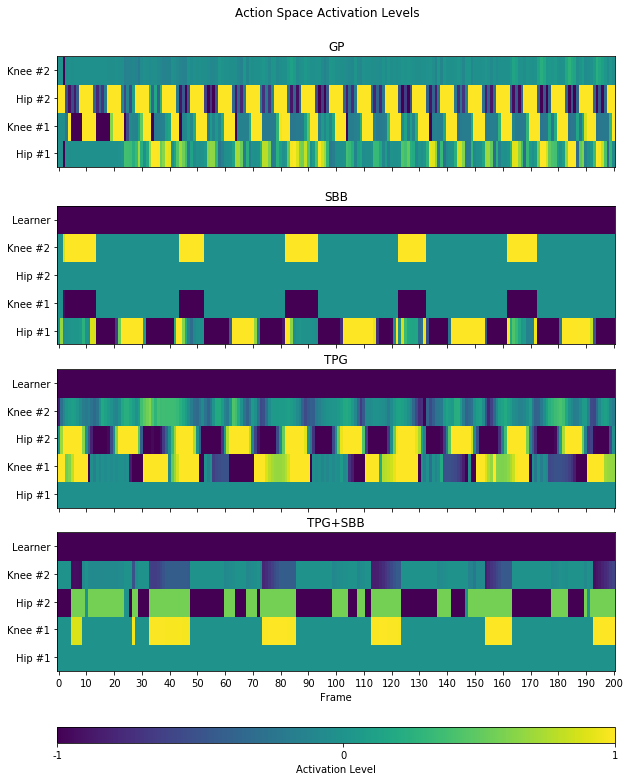

In [13]:
"""
Plot actions made over time, and what learner made that action.
"""

fig, (ax1, ax2, ax4, ax3) = plt.subplots(4,1, sharex=True, figsize=(10,11))

"""
GP
"""

action_pixels = np.repeat(np.array(gp_actions).T, (10,10,10,10), axis=0)[:,:201]

ax1.imshow(action_pixels, aspect=1)
ax1.set_yticks([5, 15, 25, 35])
ax1.set_ylim(0,40)
ax1.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2"])
ax1.set_title("GP")
ax1.set_xticks([])


"""
SBB
"""

# get all the learners that made an action each step
action_learners = []
al_uniques = set()
for al_list in sbb_learners_vis:
    action_learners.append(al_list[-1])
    al_uniques.add(al_list[-1])
    
action_learners = np.array(action_learners)
# convert learner ids to value on heatmap
for i, al in enumerate(al_uniques):
    action_learners = np.where(action_learners==al, 
        ((i/len(al_uniques))*2)-1,
        action_learners)
    
# make numeric
action_learners = np.array(action_learners, dtype=float)

# put together pixels from actions and learner selection
action_pixels = np.repeat(
    np.concatenate((np.array(sbb_actions).T, (action_learners,))), 
    (10,10,10,10,10), axis=0)[:,:201]

ax2.imshow(action_pixels, aspect=1)
ax2.set_yticks([5, 15, 25, 35, 45])
ax2.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2", "Learner"])
ax2.set_ylim(0,50)
ax2.set_title("SBB")
ax2.set_xticks([])


"""
TPG
"""

# get all the learners that made an action each step
action_learners = []
al_uniques = set()
for al_list in tpg_learners_vis:
    action_learners.append(al_list[-1])
    al_uniques.add(al_list[-1])
    
action_learners = np.array(action_learners)
# convert learner ids to value on heatmap
for i, al in enumerate(al_uniques):
    action_learners = np.where(action_learners==al, 
        ((i/len(al_uniques))*2)-1,
        action_learners)
    
# make numeric
action_learners = np.array(action_learners, dtype=float)

# put together pixels from actions and learner selection
action_pixels = np.repeat(
    np.concatenate((np.array(tpg_actions).T, (action_learners,))), 
    (10,10,10,10,10), axis=0)[:,:201]

ax4.imshow(action_pixels, aspect=1)
ax4.set_yticks([5, 15, 25, 35, 45])
ax4.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2", "Learner"])
ax4.set_ylim(0,50)
ax4.set_title("TPG")
ax4.set_xticks([])


"""
TPG+SBB
"""

# get all the learners that made an action each step
action_learners = []
al_uniques = set()
for al_list in tpgsbb_learners_vis:
    action_learners.append(al_list[-1])
    al_uniques.add(al_list[-1])
    
action_learners = np.array(action_learners)
# convert learner ids to value on heatmap
for i, al in enumerate(al_uniques):
    action_learners = np.where(action_learners==al, 
        ((i/len(al_uniques))*2)-1,
        action_learners)
    
# make numeric
action_learners = np.array(action_learners, dtype=float)

# put together pixels from actions and learner selection
action_pixels = np.repeat(
    np.concatenate((np.array(tpgsbb_actions).T, (action_learners,))), 
    (10,10,10,10,10), axis=0)[:,:201]

img = ax3.imshow(action_pixels, aspect=1)

ax3.set_yticks([5, 15, 25, 35, 45])
ax3.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2", "Learner"])
ax3.set_ylim(0,50)
ax3.set_title("TPG+SBB")
ax3.set_xticks(range(0, 201, 10))
ax3.set_xlabel("Frame")

fig.suptitle("Action Space Activation Levels")

plt.subplots_adjust(hspace=0, top=0.95, bottom=0.125)
#fig.subplots_adjust(right=0.8)
cb_ax = fig.add_axes([0.125, 0.05, 0.775, 0.02])
cb = fig.colorbar(img, ticks=[-1,0,0.949], orientation="horizontal",
                 aspect=50, pad=0.25, cax=cb_ax)
cb.set_label("Activation Level")
cb.set_ticklabels(["-1", "0" ,"1"])

plt.savefig("images/champ-actions.pdf", bbox_inches="tight")
plt.show()

## Do/Capture Runs with Rendering

In [14]:
"""
Visualize a run.
"""

#%matplotlib inline

# https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
def show_state(env, r_type, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    #plt.title("%s | Step: %d %s" % ("BipedalWalker-v3",step, info))
    plt.axis('off')
    
    plt.savefig(f"images/renders/{r_type}/frame-{step}.png")

    display.clear_output(wait=True)
    display.display(plt.gcf())

def do_run(agent, r_type, frames=99999):

    env = gym.make("BipedalWalker-v3")

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):
        
        show_state(env, r_type, i)
        #screen = env.render()#mode="rgb_array")

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        act = agent.act(state)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)

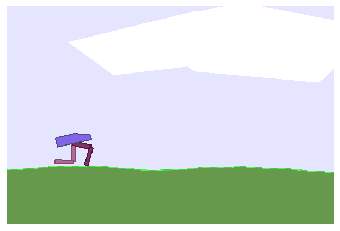

Score:  24.571045392960606
Total frames:  199


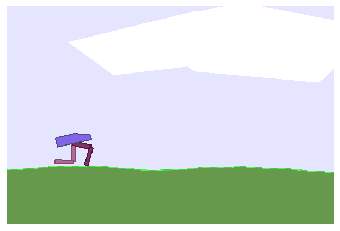

In [20]:
#%matplotlib inline
#do_run(gp_best, r_type="gp", frames=200)

In [21]:
# turn graphing back to normal
%matplotlib auto

Using matplotlib backend: Qt5Agg
